# QhX

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import QhX

In [7]:
#control group - MRK6, PG1302-102, MRK877, UGC3973, MRK1018, MRK1383, MRK876

#MRK6
mrk6 = pd.read_csv("lightcurve/data/mrk6.csv")
mrk6_vreme = mrk6["hjd"]
mrk6_mag = mrk6['mag']
mrk6_magerr = mrk6['magerr']
#PG1302-102
pg1302102 = pd.read_csv("lightcurve/data/pg1302102.csv")
pg1302102_vreme = pg1302102["hjd"]
pg1302102_mag = pg1302102['mag']
pg1302102_magerr = pg1302102['magerr']
#MRK877
mrk877 = pd.read_csv("lightcurve/data/mrk877.csv")
mrk877_vreme = mrk877["hjd"]
mrk877_mag = mrk877['mag']
mrk877_magerr = mrk877['magerr']
#UGC3973
ugc3973 = pd.read_csv("lightcurve/data/ugc3973.csv")
ugc3973_vreme = ugc3973["hjd"]
ugc3973_mag = ugc3973['mag']
ugc3973_magerr = ugc3973['magerr']
#mRK1018
mrk1018 = pd.read_csv("lightcurve/data/mrk1018.csv")
mrk1018_vreme = mrk1018["hjd"]
mrk1018_mag = mrk1018['mag']
mrk1018_magerr = mrk1018['magerr']
#MRK1383
mrk1383 = pd.read_csv("lightcurve/data/mrk1383.csv")
mrk1383_vreme = mrk1383["hjd"]
mrk1383_mag = mrk1383['mag']
mrk1383_magerr = mrk1383['magerr']
#MRK876
mrk876 = pd.read_csv("lightcurve/data/mrk876.csv")
mrk876_vreme = mrk876["hjd"]
mrk876_mag = mrk876['mag']
mrk876_magerr = mrk876['magerr']

#study group - OJ287, NGC4151, MRK335, NGC5548, 3C273
#oj287
oj287 = pd.read_csv("lightcurve/data/oj287.csv")
oj287_vreme = oj287["hjd"]
oj287_mag = oj287['mag']
oj287_magerr = oj287['magerr']

#ngc4151
ngc4151 = pd.read_csv("lightcurve/data/ngc4151.csv")
ngc4151_vreme = ngc4151["hjd"]
ngc4151_mag = ngc4151['mag']
ngc4151_magerr = ngc4151['magerr']

#mrk335
mrk335 = pd.read_csv("lightcurve/data/mrk335.csv")
mrk335_vreme = mrk335["hjd"]
mrk335_mag = mrk335['mag']
mrk335_magerr = mrk335['magerr']

#ngc5548
ngc5548 = pd.read_csv("lightcurve/data/ngc5548.csv")
ngc5548_vreme = ngc5548["hjd"]
ngc5548_mag = ngc5548['mag']
ngc5548_magerr = ngc5548['magerr']

#3c273
x3c273 = pd.read_csv("lightcurve/data/3c273.csv")
x3c273_vreme = x3c273["hjd"]
x3c273_mag = x3c273['mag']
x3c273_magerr = x3c273['magerr']

In [9]:
agn_ime = ['MRK6', 'MRK877', 'PG1302102', 'UGC3973', 'MRK1018', 'MRK1383','MRK876',
           'NGC 5548', 'NGC 4151', '3C273', 'MRK 335', 'OJ 287']
agn_vreme = [mrk6_vreme, mrk877_vreme, pg1302102_vreme,
             ugc3973_vreme, mrk1018_vreme, mrk1383_vreme, mrk876_vreme,
            ngc5548_vreme, ngc4151_vreme, x3c273_vreme, mrk335_vreme, oj287_vreme]

agn_mag = [mrk6_mag, mrk877_mag, pg1302102_mag,
            ugc3973_mag, mrk1018_mag, mrk1383_mag, mrk876_mag,
            ngc5548_mag, ngc4151_mag, x3c273_mag, mrk335_mag, oj287_mag]

agn_magerr = [mrk6_magerr, mrk877_magerr, pg1302102_magerr,
           ugc3973_magerr, mrk1018_magerr, mrk1383_magerr, mrk876_magerr,
           ngc5548_magerr, ngc4151_magerr, x3c273_magerr ,mrk335_magerr, oj287_magerr]

In [34]:
print(agn_vreme[1].values)

[2458203.92147453 2458206.92191691 2458207.0112164  ... 2460050.9356338
 2460056.89450897 2460094.78150925]


## primer koda

In [13]:
from QhX.algorithms.wavelets.wwtz import *
from QhX import plots
from QhX.utils import *
from QhX.calculation import *

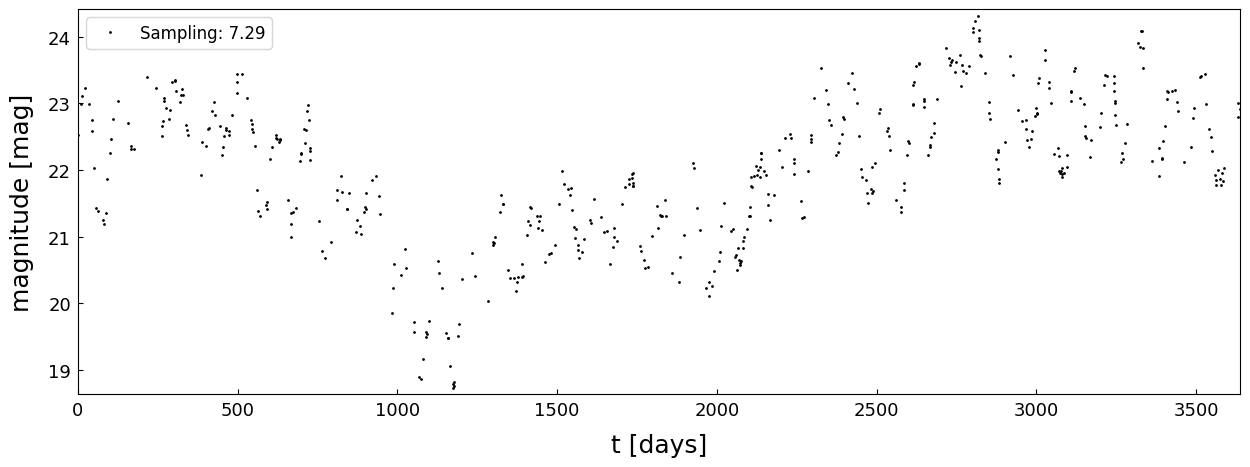

In [15]:
period = 100  # days
amplitude = 0.3
tt, yy = simple_mock_lc(time_interval=10, num_points=1000, frequency=period, amplitude=amplitude, percent=0.5, magnitude=22)
plots.fig_plot(tt, yy)

In [17]:
wwz_matrix, corr, extent = hybrid2d(tt, yy, 80, 800, minfq=2000,maxfq=10)

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.198
largest tau window is  46.056
111.94 seconds has passed to complete Weighted Wavelet Z-transform 



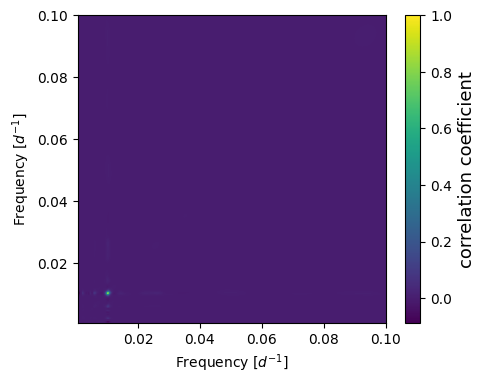

In [20]:
plots.plt_freq_heatmap(corr, extent)

Period: 99.237, upper error :  2.98  lower error :  2.29


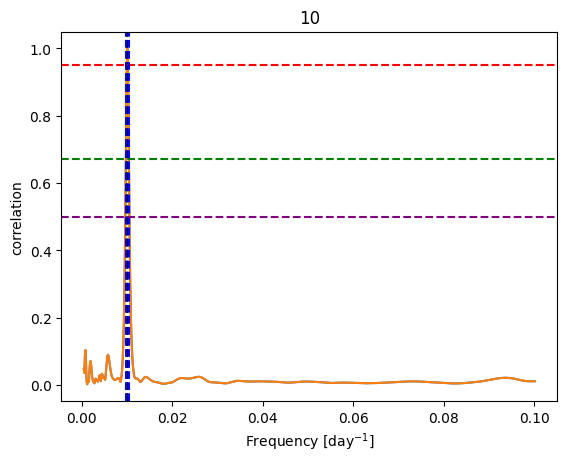

In [22]:
numlc1 =10  # Example Object ID
numlc=10 #number of lc for johnson method
peak = 0  # Example peak position
idx_peaks = [0]  # Example index of peak, assuming a single peak

# Function for calculations of periods
peaks0, hh0, r_periods0, up0, low0 = periods(10, corr, 800, plot=True, minfq=2000, maxfq=10)

# Blue vertical lines represent the border of a half width of a peak
# Green and red horizontal lines represent the calculated values of a quantiles
# Purple line is a calculated value of half width of a peak

# Write down obtained results
for j in range(len(r_periods0)):
    print("Period: %6.3f, upper error : %5.2f  lower error : %5.2f"% (r_periods0[j], up0[j], low0[j]) )

# Podaci

In [36]:
wwz_matrix, corr, extent = hybrid2d(agn_vreme[0].values, agn_mag[0].values, 80, 800, minfq=2000,maxfq=10)

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.873
largest tau window is  22.481
293.33 seconds has passed to complete Weighted Wavelet Z-transform 



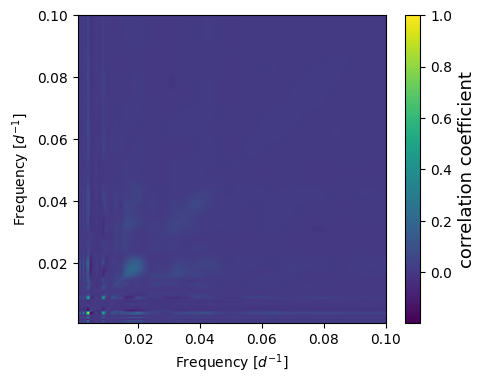

In [40]:
plots.plt_freq_heatmap(corr, extent)

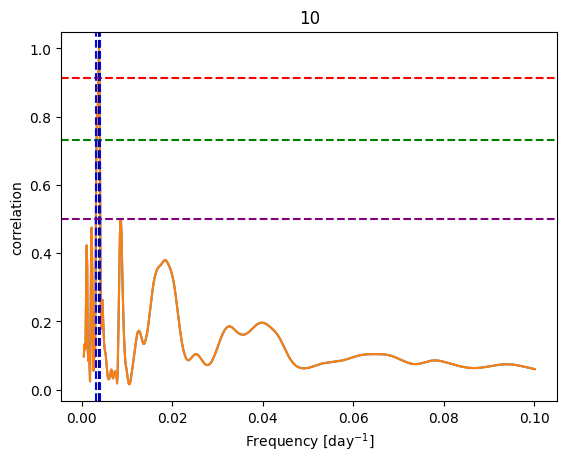

In [42]:
peaks0, hh0, r_periods0, up0, low0 = periods(10, corr, 800, plot=True, minfq=2000, maxfq=10)

In [44]:
for j in range(len(r_periods0)):
    print("Period: %6.3f, upper error : %5.2f  lower error : %5.2f"% (r_periods0[j], up0[j], low0[j]) )

Period: 259.193, upper error : 186.99  lower error :  6.72


## Analiza krivih sjaja

In [66]:
# study grupa

In [54]:
corr_list = []
extent_list = []
for i in tqdm(range(len(agn_ime))):
    wwz_matrix,corr,extent = hybrid2d(agn_vreme[i].values,agn_mag[i].values,80,800,minfq=2000,maxfq=10)
    corr_list.append(corr)
    extent_list.append(extent)

  0%|                                                    | 0/12 [00:00<?, ?it/s]

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.873
largest tau window is  22.481


  8%|███▌                                       | 1/12 [04:40<51:27, 280.66s/it]

280.65 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.509
largest tau window is  23.935


/opt/anaconda3/lib/python3.12/site-packages/libwwz/wwz.py:234: RuntimeWarning: overflow encountered in scalar divide
  dvarw = dvarw / dmat[0, 0]
 17%|███████▏                                   | 2/12 [07:57<38:35, 231.59s/it]

197.24 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.324
largest tau window is  24.227


 25%|██████████▊                                | 3/12 [09:13<24:04, 160.52s/it]

75.92 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  1.013
largest tau window is  29.536


 33%|██████████████▎                            | 4/12 [13:23<26:04, 195.53s/it]

249.2 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.489
largest tau window is  20.882


 42%|█████████████████▉                         | 5/12 [15:41<20:24, 174.96s/it]

138.48 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.335
largest tau window is  19.656


 50%|█████████████████████▌                     | 6/12 [17:09<14:31, 145.26s/it]

87.6 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  1.003
largest tau window is  30.048


 58%|█████████████████████████                  | 7/12 [23:46<16:58, 203.78s/it]

397.31 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

adjusted time_divisions to:  0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [70]:
print(len(corr_list))
print(len(agn_ime))
print(len(agn_ime)-len(corr_list))

7
12
5


In [100]:
peaks0_list = []
hh0_list = []
r_periods0_list = []
up0_list = []
low0_list = []

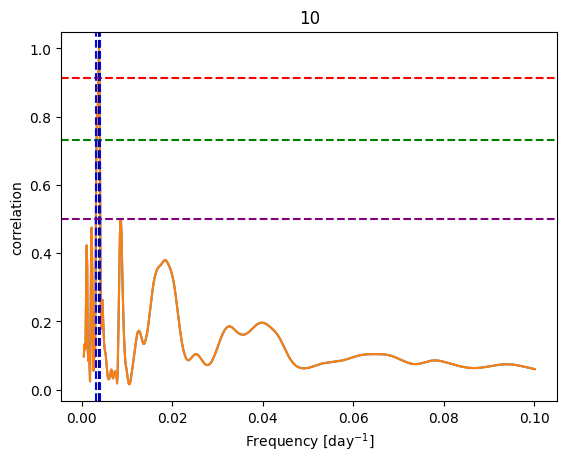

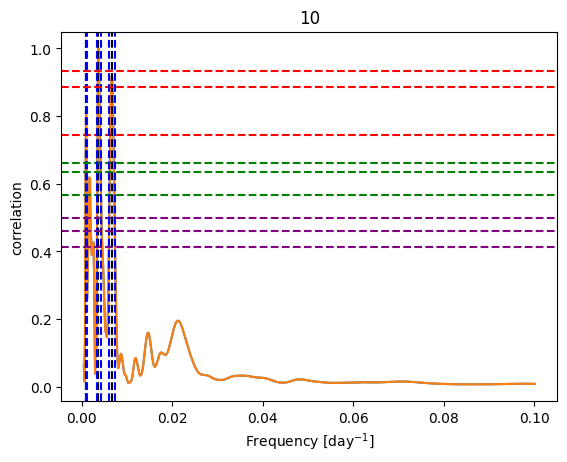

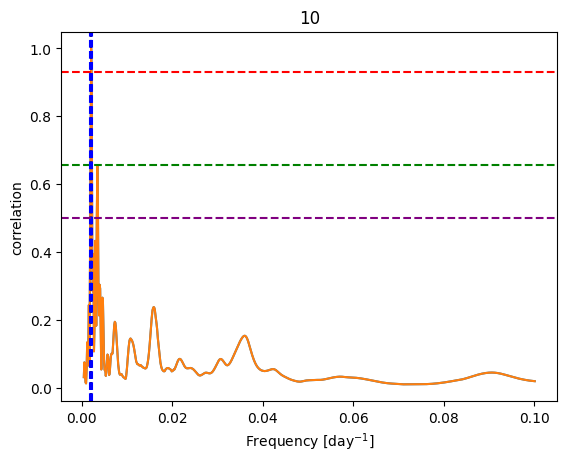

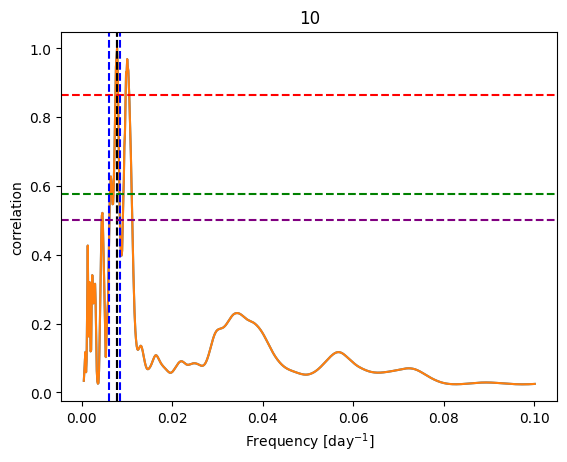

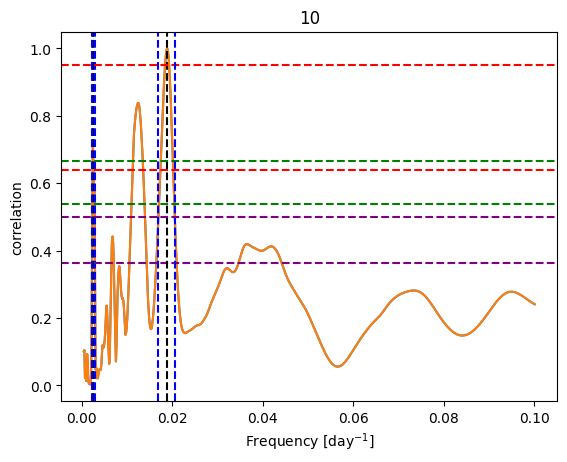

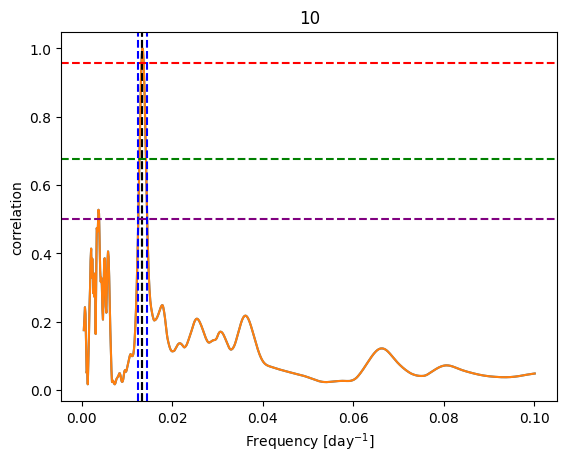

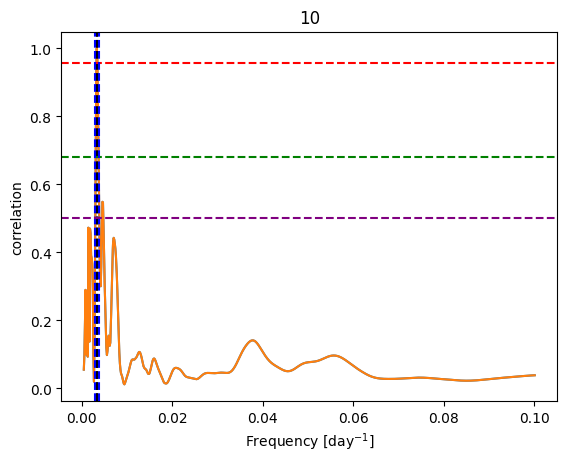

In [102]:
for i in (range(7)):
    plt.figure()
    peaks0, hh0, r_periods0, up0, low0 = periods(10, corr_list[i], 800, plot=True, minfq=2000, maxfq=10)
    peaks0_list.append(peaks0)
    hh0_list.append(hh0)
    r_periods0_list.append(r_periods0)
    up0_list.append(up0)
    low0_list.append(low0)


In [74]:
for i in tqdm(range(8,11)):
    wwz_matrix,corr,extent = hybrid2d(agn_vreme[i].values,agn_mag[i].values,80,800,minfq=2000,maxfq=10)
    corr_list.append(corr)
    extent_list.append(extent)

  0%|                                                     | 0/3 [00:00<?, ?it/s]

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.998
largest tau window is  23.847


 33%|██████████████▋                             | 1/3 [03:52<07:44, 232.26s/it]

232.25 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.986
largest tau window is  27.938


 67%|█████████████████████████████▎              | 2/3 [05:57<02:49, 169.12s/it]

124.92 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.504
largest tau window is  27.557


/opt/anaconda3/lib/python3.12/site-packages/libwwz/wwz.py:234: RuntimeWarning: overflow encountered in scalar divide
  dvarw = dvarw / dmat[0, 0]
100%|████████████████████████████████████████████| 3/3 [08:09<00:00, 163.12s/it]

132.17 seconds has passed to complete Weighted Wavelet Z-transform 



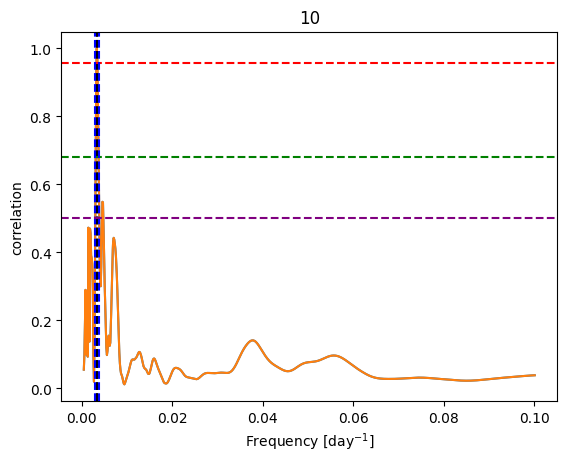

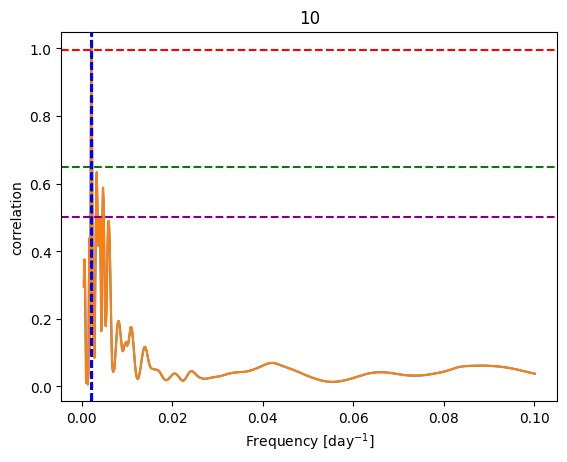

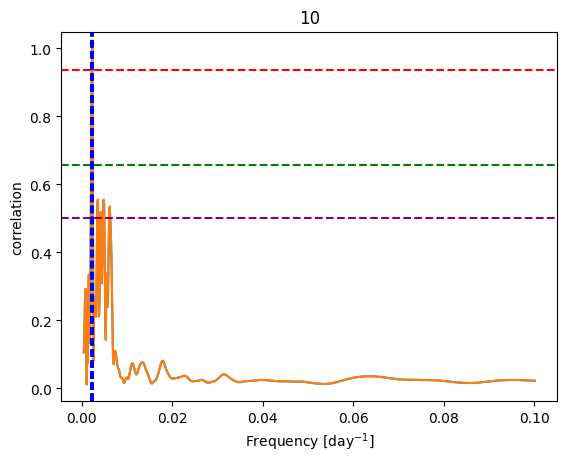

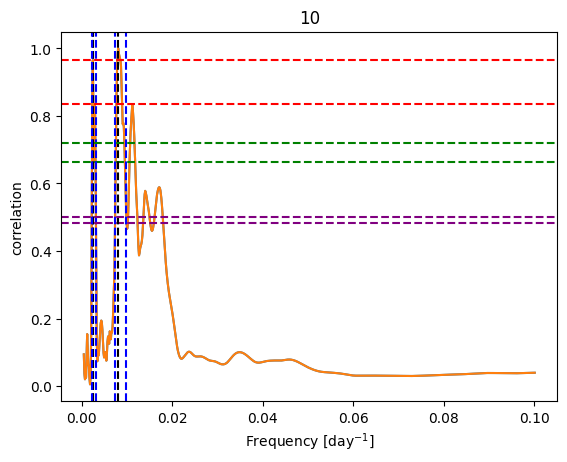

In [104]:
for i in (range(6,10)):
    plt.figure()
    peaks0, hh0, r_periods0, up0, low0 = periods(10, corr_list[i], 800, plot=True, minfq=2000, maxfq=10)
    peaks0_list.append(peaks0)
    hh0_list.append(hh0)
    r_periods0_list.append(r_periods0)
    up0_list.append(up0)
    low0_list.append(low0)
plt.show()

In [140]:
for j in range(len(r_periods0_list)):
    print('-'*50)
    print(agn_ime[j])
    for k in range(len(r_periods0_list[j])):
        print("Period: %6.3f, upper error : %5.2f  lower error : %5.2f"% (r_periods0_list[j][k], up0_list[j][k], low0_list[j][k]) )

--------------------------------------------------
MRK6
Period: 259.193, upper error : 186.99  lower error :  6.72
--------------------------------------------------
MRK877
Period: 1002.506, upper error : 155.85  lower error : 33.20
Period: 267.827, upper error : 19.95  lower error :  8.50
Period: 148.837, upper error : 99.09  lower error :  2.80
--------------------------------------------------
PG1302102
Period: 472.394, upper error : 38.58  lower error : 16.26
--------------------------------------------------
UGC3973
Period: 127.582, upper error : 107.92  lower error :  3.41
--------------------------------------------------
MRK1018
Period: 401.606, upper error : 20.28  lower error : 19.81
Period: 52.889, upper error : 52.49  lower error : 20.80
--------------------------------------------------
MRK1383
Period: 74.432, upper error : 41.38  lower error :  4.24
--------------------------------------------------
MRK876
Period: 297.564, upper error : 23.95  lower error : 12.99
--------